# Initialization

In [13]:
# module import
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from math import ceil,floor

# define commonly reused variables
endpt = -19
orbct = 14

# define orbitals
atomlist = []
Nlist = []
Llist = []
llist = []
Mlist = []
for s in range(6):
    atomlist.append("P ")
    Nlist.append(s + 1)
    Llist.append(0)
    llist.append("s")
    Mlist.append(-0)
for p in range(4):
    for m in range(3):
        atomlist.append("P ")
        Nlist.append(p + 2)
        Llist.append(1)
        llist.append("p")
        Mlist.append(m - 1)
for d in range(2):
    for m in range(5):
        atomlist.append("P ")
        Nlist.append(d + 3)
        Llist.append(2)
        llist.append("d")
        Mlist.append(m - 2)
for f in range(1):
    for m in range(7):
        atomlist.append("P ")
        Nlist.append(f + 4)
        Llist.append(3)
        llist.append("f")
        Mlist.append(m - 3)
for atom in range(3):
    for s in range(2):
        atomlist.append("H" + str(atom + 1))
        Nlist.append(s + 1)
        Llist.append(0)
        llist.append("s")
        Mlist.append(0)
    for p in range(3):
        for m in range(1):
            atomlist.append("H" + str(atom + 1))
            Nlist.append(p + 2)
            Llist.append(1)
            llist.append("p")
            Mlist.append(m - 1)

# combine basis function information
BFI = []
for i in range(len(atomlist)):
    BFI.append(atomlist[i] + "  " + str(Nlist[i]) + llist[i] + format(Mlist[i], "3.0f"))
print(len(BFI))

50


# Compare 2 points

In [14]:
# extract data from left side of discontinuity
f = open("MOC/2.54", "r")
lines = f.readlines()
f.close()

# extract coeffs
coeffs = []
for line in lines[12:endpt]:
    print(line)
    lentry = line[3:25]
    centry = line[28:50]
    rentry = line[53:75]
    if not lentry == '':
        coeffs.append(lentry)
    if not centry == '':
        coeffs.append(centry)
    if not rentry == '':
        coeffs.append(rentry)

# identify where basis sets end
split_list = []
for i in range(len(coeffs)):
    if i%len(BFI) == 0 and not i==0:
        split_list.append(i)
print(len(split_list))
# sort coeffs
sortedmocoefs = [coeffs[i : j] for i, j in zip([0] + 
          split_list, split_list + [None])]

# convert to float
floatmos = []
squared_floatmos = []
for orbital in sortedmocoefs:
    temporb = []
    squared_temporb = []
    for coeff in orbital:
        temporb.append(float(coeff[:18] + "e" + coeff[19:]))
        squared_temporb.append(float(coeff[:18] + "e" + coeff[19:])**2)
    floatmos.append(temporb)
    squared_floatmos.append(squared_temporb)

# extract data from right side of discontinuity
f = open("MOC/2.56", "r")
lines = f.readlines()
f.close()

# extract coeffs
coeffs = []
for line in lines[12:endpt]:
    lentry = line[3:25]
    centry = line[28:50]
    rentry = line[53:75]
    if not lentry == '':
        coeffs.append(lentry)
    if not centry == '':
        coeffs.append(centry)
    if not rentry == '':
        coeffs.append(rentry)

# identify where basis sets end
split_list = []
for i in range(len(coeffs)):
    if i%len(BFI) == 0 and not i==0:
        split_list.append(i)

# sort coeffs
sortedmocoefs = [coeffs[i : j] for i, j in zip([0] + 
          split_list, split_list + [None])]

# convert to float
floatmos = []
squared_floatmos2 = []
for orbital in sortedmocoefs:
    temporb = []
    squared_temporb = []
    for coeff in orbital:
        temporb.append(float(coeff[:18] + "e" + coeff[19:]))
        squared_temporb.append(float(coeff[:18] + "e" + coeff[19:])**2)
    floatmos.append(temporb)
    squared_floatmos2.append(squared_temporb)

    1.000015270222442D+00    1.051520242604899D-04    3.282990463458568D-04

   -8.060797581404949D-05   -2.005166412307440D-04    1.645242377209378D-05

    5.897039198036033D-06   -2.746595490180126D-11   -4.117159436730927D-05

    1.830343711435645D-05   -7.171548148248144D-11   -8.540396123123310D-05

   -2.763099996268353D-06    1.872667303971927D-11    4.228725223572318D-05

   -1.149946953106046D-05    1.353582462407606D-11    8.222489062772195D-05

    4.949613700999588D-12    9.992153136006611D-12   -6.530798364798813D-08

   -1.648138527161262D-06    1.837205311276812D-06    3.352460743033407D-12

    4.589876420248395D-12   -3.101909852331635D-07    1.540724726562968D-06

   -7.287610509055483D-07   -7.305166500449450D-14   -9.940167156090336D-13

   -1.642840683754987D-13   -1.475876626514887D-06   -2.616010420598698D-07

   -1.007038080674300D-06   -2.520894071180342D-06    3.384960355285133D-05

    4.014893696849532D-05    9.772482627682760D-08   -2.780331366088082D-13


In [15]:
# make Pandas DataFrame for squared mocoefs
for orbital in range(orbct):
    df = pd.DataFrame({'Basis function':BFI, 'Squared MO coefficient':squared_floatmos[orbital]})
    df = df.sort_values(by=['Squared MO coefficient'], ascending=False)
    df2 = pd.DataFrame({'Basis function':BFI, 'Squared MO coefficient':squared_floatmos2[orbital]})
    df2 = df2.sort_values(by=['Squared MO coefficient'], ascending=False)
    print("Orbital " + str(orbital + 1))
    for i in range(10):
        print(df['Basis function'].iloc[i] + format(df['Squared MO coefficient'].iloc[i], "7.2f") + "      " + df2['Basis function'].iloc[i] + format(df2['Squared MO coefficient'].iloc[i], "7.2f"))
    print("\n")

Orbital 1
P   1s  0   1.00      P   1s  0   1.00
P   3s  0   0.00      P   3s  0   0.00
P   5s  0   0.00      P   5s  0   0.00
P   2s  0   0.00      P   2s  0   0.00
P   3p  1   0.00      P   3p  1   0.00
P   5p  1   0.00      P   5p  1   0.00
P   4s  0   0.00      P   4s  0   0.00
P   4p  1   0.00      P   2p  1   0.00
P   2p  1   0.00      P   4p  1   0.00
H1  2s  0   0.00      H1  2s  0   0.00


Orbital 2
P   2s  0   1.00      P   2s  0   1.00
P   3s  0   0.00      P   3s  0   0.00
P   5s  0   0.00      P   5s  0   0.00
P   4s  0   0.00      P   2p  1   0.00
P   2p -1   0.00      H1  1s  0   0.00
H1  2s  0   0.00      P   3p  1   0.00
P   5p  1   0.00      P   4s  0   0.00
H2  2s  0   0.00      P   5p  1   0.00
H3  2s  0   0.00      P   4p  1   0.00
P   3p  1   0.00      P   2p -1   0.00


Orbital 3
P   2p -1   0.89      P   2p -1   0.70
P   2p  1   0.11      P   2p  1   0.30
H1  1s  0   0.00      H1  1s  0   0.00
H1  2s  0   0.00      P   3s  0   0.00
P   3s  0   0.00      H1  2s  

# Analyze orbital discontinuities

In [16]:
# get all geometries
unorderedgeoms = os.listdir("MOC")
fltgeoms = []
for geom in unorderedgeoms:
    fltgeoms.append(float(geom))
fltgeoms.sort()
# produce sorted directory list
srtdgeoms = []
srtdflt = []
for geom in fltgeoms:
    srtdgeoms.append(format(geom, ".2f"))
    srtdflt.append(geom)

# intelligently interpret
prev_dom = []
prev_co = []
for i in range(orbct):
    prev_dom.append("NONE")
    prev_co.append("1.2")
for geom in srtdgeoms:
    f = open("MOC/" + geom, "r")
    lines = f.readlines()
    f.close()

    # extract coeffs
    coeffs = []
    for line in lines[12:endpt]:
        lentry = line[3:25]
        centry = line[28:50]
        rentry = line[53:75]
        if not lentry == '':
            coeffs.append(lentry)
        if not centry == '':
            coeffs.append(centry)
        if not rentry == '':
            coeffs.append(rentry)

    # identify where basis sets end
    split_list = []
    for i in range(len(coeffs)):
        if i%len(BFI) == 0 and not i==0:
            split_list.append(i)

    # sort coeffs
    sortedmocoefs = [coeffs[i : j] for i, j in zip([0] + 
          split_list, split_list + [None])]

    # convert to float
    floatmos = []
    squared_floatmos = []
    for orbital in sortedmocoefs:
        temporb = []
        squared_temporb = []
        for coeff in orbital:
            temporb.append(float(coeff[:18] + "e" + coeff[19:]))
            squared_temporb.append(float(coeff[:18] + "e" + coeff[19:])**2)
        floatmos.append(temporb)
        squared_floatmos.append(squared_temporb)
    
    # make Pandas DataFrame for squared mocoefs
    for orbital in range(orbct):
        df = pd.DataFrame({'Basis function':BFI, 'Squared MO coefficient':squared_floatmos[orbital]})
        df = df.sort_values(by=['Squared MO coefficient'], ascending=False)
        if not df['Basis function'].iloc[0] == prev_dom[orbital]:
            if not prev_dom[orbital] == "NONE":
                PA = "At " + geom + " Bohr, the character of orbital " + format(orbital + 1, "2.0f")
                PB = " changed from         " + format(prev_co[orbital], ".2f") + "     "
                PC = prev_dom[orbital] + "         to         " + format(df['Squared MO coefficient'].iloc[0], ".2f")
                PD = "     " + df['Basis function'].iloc[0]
                print(PA + PB + PC + PD)
        prev_dom[orbital] = df['Basis function'].iloc[0]
        prev_co[orbital] = df['Squared MO coefficient'].iloc[0]
    print()






















At 0.92 Bohr, the character of orbital  4 changed from         0.37     P   2p  1         to         0.37     P   2p -1
At 0.92 Bohr, the character of orbital 10 changed from         0.34     P   5s  0         to         0.33     P   5p -1



At 0.98 Bohr, the character of orbital  3 changed from         0.52     P   2p  0         to         0.49     P   2p  1

At 1.00 Bohr, the character of orbital 12 changed from         0.55     H1  1s  0         to         0.75     P   3p  0

At 1.02 Bohr, the character of orbital  4 changed from         0.39     P   2p -1         to         0.41     P   2p  0
At 1.02 Bohr, the character of orbital 13 changed from         0.46     P   3p  0         to         0.56     H1  1s  0



At 1.08 Bohr, the character of orbital  3 changed from         0.58     P   2p  1         to         1.00     P   2p  0
At 1.08 Bohr, the character of orbital  4 changed from         0.44     P   2p  0         to         0.77     P   2p  1
At 1.08 Boh

At 3.04 Bohr, the character of orbital  3 changed from         0.47     P   2p -1         to         0.55     P   2p  1
At 3.04 Bohr, the character of orbital  9 changed from         0.30     P   3p  1         to         0.31     H3  1s  0



At 3.10 Bohr, the character of orbital  8 changed from         0.27     P   3p  0         to         0.27     H2  1s  0


At 3.14 Bohr, the character of orbital  3 changed from         0.49     P   2p  1         to         0.46     P   2p  0


At 3.18 Bohr, the character of orbital  5 changed from         0.53     P   2p  0         to         0.49     P   2p  1
At 3.18 Bohr, the character of orbital  7 changed from         0.28     P   3p -1         to         0.32     P   3s  0


At 3.22 Bohr, the character of orbital 13 changed from         0.12     H1  1s  0         to         0.08     P   4d  1


At 3.26 Bohr, the character of orbital  9 changed from         0.39     H3  1s  0         to         0.39     P   3p  0
At 3.26 Bohr, the character o


At 8.92 Bohr, the character of orbital 11 changed from         0.60     H3  1s  0         to         0.60     H2  1s  0


At 8.96 Bohr, the character of orbital 11 changed from         0.60     H2  1s  0         to         0.60     H3  1s  0


At 9.00 Bohr, the character of orbital 11 changed from         0.60     H3  1s  0         to         0.60     H2  1s  0




At 9.08 Bohr, the character of orbital  8 changed from         0.42     H3  1s  0         to         0.42     H2  1s  0
At 9.08 Bohr, the character of orbital 11 changed from         0.60     H2  1s  0         to         0.60     H3  1s  0

At 9.10 Bohr, the character of orbital  8 changed from         0.42     H2  1s  0         to         0.42     H3  1s  0
At 9.10 Bohr, the character of orbital 11 changed from         0.60     H3  1s  0         to         0.60     H2  1s  0

At 9.12 Bohr, the character of orbital 11 changed from         0.60     H2  1s  0         to         0.60     H3  1s  0

At 9.14 Bohr, the character 

# Analyze change in d-orbital character

In [35]:
# determine d character
dchar = []
fchar = []
for i in range(orbct):
    dchar.append([])
    fchar.append([])
for geom in srtdgeoms:
    f = open("MOC/" + geom, "r")
    lines = f.readlines()
    f.close()

    # extract coeffs
    coeffs = []
    for line in lines[12:endpt]:
        lentry = line[3:25]
        centry = line[28:50]
        rentry = line[53:75]
        if not lentry == '':
            coeffs.append(lentry)
        if not centry == '':
            coeffs.append(centry)
        if not rentry == '':
            coeffs.append(rentry)

    # identify where basis sets end
    split_list = []
    for i in range(len(coeffs)):
        if i%len(BFI) == 0 and not i==0:
            split_list.append(i)

    # sort coeffs
    sortedmocoefs = [coeffs[i : j] for i, j in zip([0] + 
          split_list, split_list + [None])]

    # convert to float
    floatmos = []
    squared_floatmos = []
    for orbital in sortedmocoefs:
        temporb = []
        squared_temporb = []
        for coeff in orbital:
            temporb.append(float(coeff[:18] + "e" + coeff[19:]))
            squared_temporb.append(float(coeff[:18] + "e" + coeff[19:])**2)
        floatmos.append(temporb)
        squared_floatmos.append(squared_temporb)
    for orbital in range(orbct):
        df = pd.DataFrame({'Basis function':BFI, 'Squared MO coefficient':squared_floatmos[orbital]})
        df = df.sort_values(by=['Squared MO coefficient'], ascending=False)
        dtemp = 0
        ftemp = 0
        for i in range(len(df['Basis function'])):
            if "d" in df['Basis function'].iloc[i]:
                dtemp += df['Squared MO coefficient'].iloc[i]
            if "f" in df['Basis function'].iloc[i]:
                ftemp += df['Squared MO coefficient'].iloc[i]
        dchar[orbital].append(dtemp)
        fchar[orbital].append(ftemp)

# organize and print results
data = {'Geometry':srtdflt}
fdata = {'Geometry':srtdflt}
for i in range(orbct):
    data[i + 1] = dchar[i]
    fdata[i + 1] = fchar[i]

# Create DataFrame
dc = pd.DataFrame(data)
fc = pd.DataFrame(fdata)

<IPython.core.display.Javascript object>


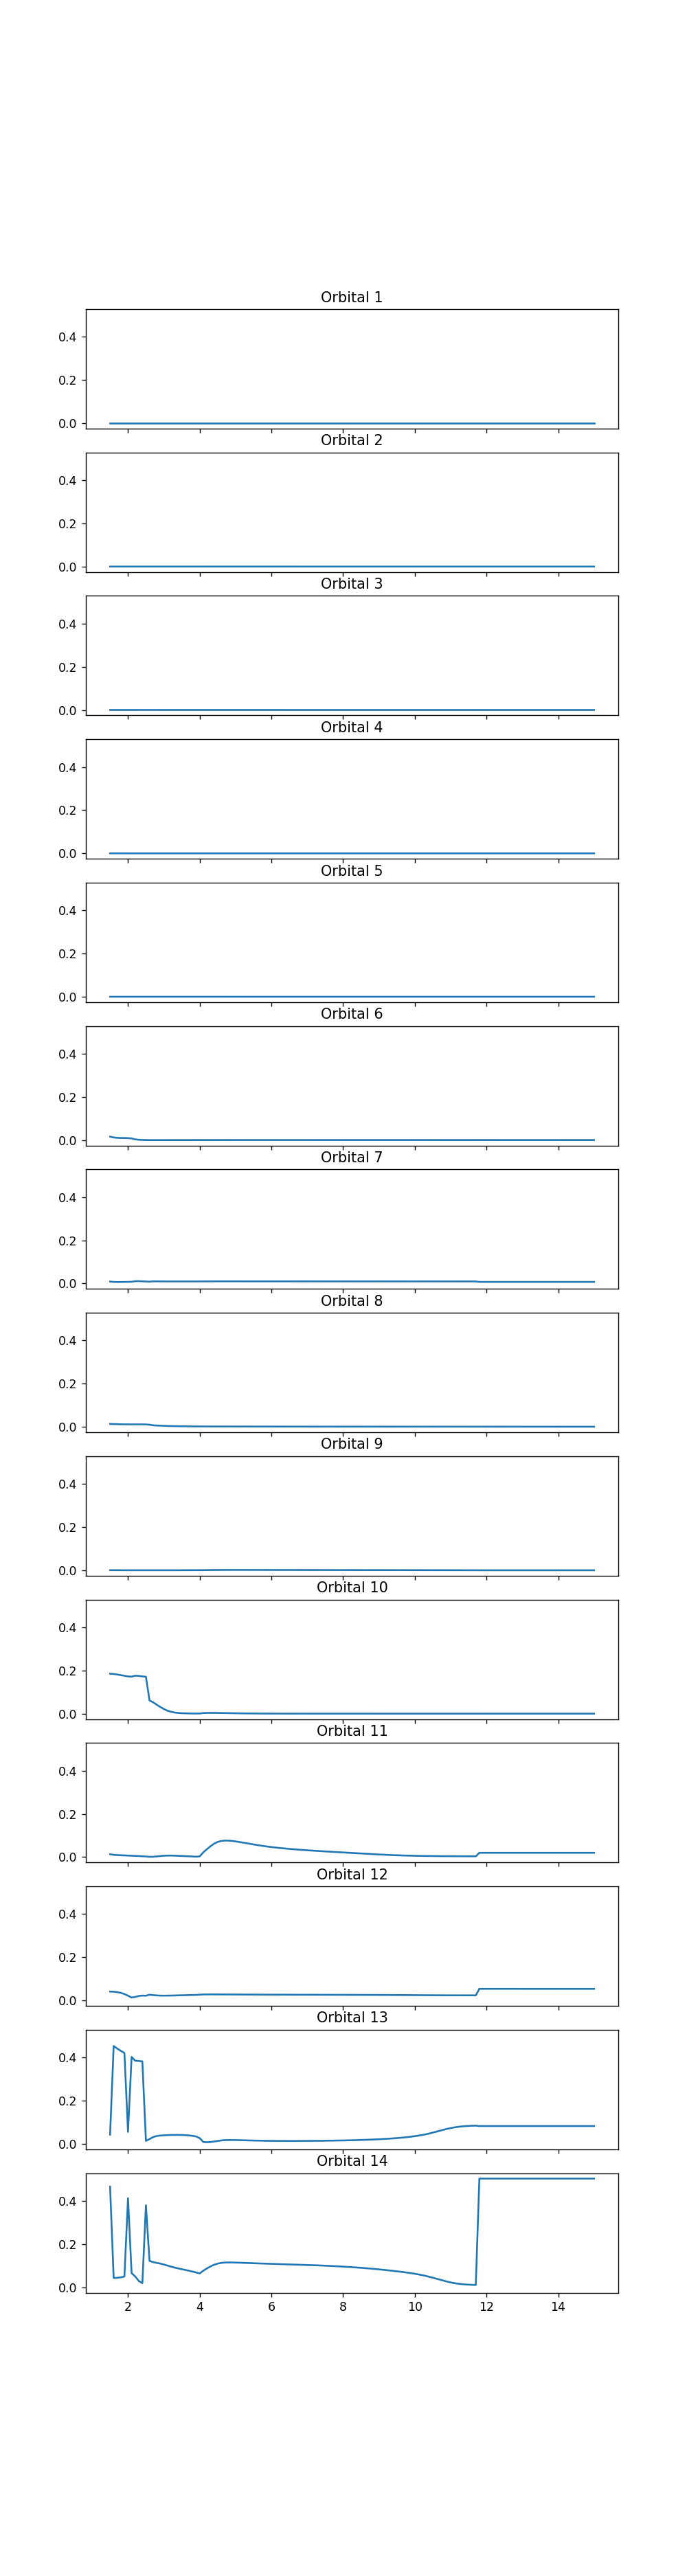

<IPython.core.display.Javascript object>


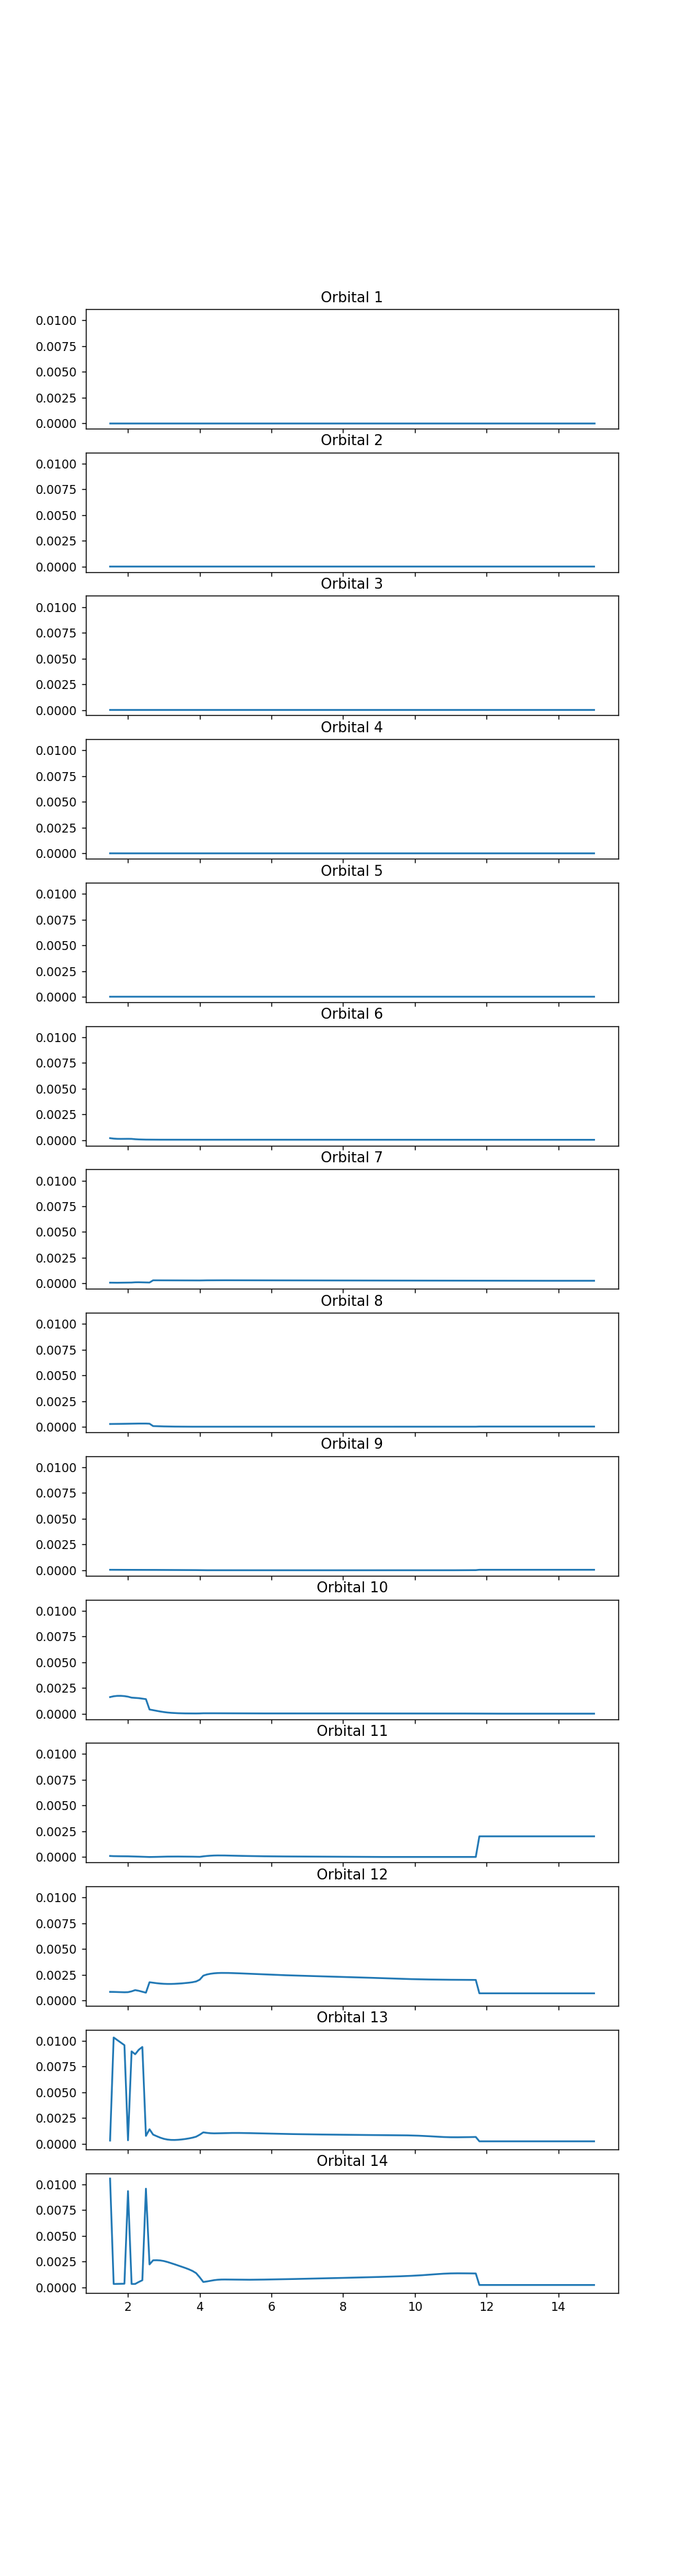

In [37]:
%matplotlib notebook
# generates four subplots
# axes are shared for easier comparison
fig,ax = plt.subplots(orbct,1,sharex=True,sharey=True,figsize=(8,30))
data_set = 0
for key in range(orbct):
    # plots the dataset as individual points
    ax[data_set].plot(data["Geometry"], data[key + 1], label = str(key + 1))
    # labels each subplot with the dataset name
    ax[data_set].set_title("Orbital " + str(key + 1))
    # moves onto next dataset
    data_set += 1
fig,ax = plt.subplots(orbct,1,sharex=True,sharey=True,figsize=(8,30))
data_set = 0
for key in range(orbct):
    # plots the dataset as individual points
    ax[data_set].plot(fdata["Geometry"], fdata[key + 1], label = str(key + 1))
    # labels each subplot with the dataset name
    ax[data_set].set_title("Orbital " + str(key + 1))
    # moves onto next dataset
    data_set += 1

# Tests and miscellaneous

In [4]:
# make Pandas DataFrame for squared mocoefs
for orbital in range(14):
    df = pd.DataFrame({'Basis function':BFI, 'Squared MO coefficient':squared_floatmos[orbital]})
    df = df.sort_values(by=['Squared MO coefficient'], ascending=False)
    print("Orbital " + str(orbital + 1))
    i = 0
    while df['Squared MO coefficient'].iloc[i] > 0.01:
        #print(df.iloc[[i]])
        print(df['Basis function'].iloc[i] + format(df['Squared MO coefficient'].iloc[i], "10.2f"))
        i += 1
    print("\n")

Orbital 1
P   1s  0      1.00


Orbital 2
P   2s  0      1.00


Orbital 3
P   2p -1      0.89
P   2p  1      0.11


Orbital 4
P   2p  0      1.00


Orbital 5
P   2p  1      0.89
P   2p -1      0.11


Orbital 6
P   3s  0      0.67
H1  1s  0      0.24
H2  1s  0      0.03
H3  1s  0      0.03
H1  3s  0      0.02
P   3p -1      0.02
P   3p  1      0.02


Orbital 7
P   3p -1      0.40
H1  1s  0      0.29
H3  1s  0      0.14
H2  1s  0      0.14
P   3s  0      0.03
H1  3s  0      0.02


Orbital 8
P   3p  0      0.43
H2  1s  0      0.25
H3  1s  0      0.25


Orbital 9
P   3p  1      0.59
P   3s  0      0.23
H1  1s  0      0.09
H3  1s  0      0.06
H2  1s  0      0.06


Orbital 10
P   3s  0      0.20
H2  4s  0      0.18
H3  4s  0      0.18
P   5s  0      0.18
P   3p  1      0.10
H1  3s  0      0.06
P   6s  0      0.06
P   6p  1      0.05
P   3p -1      0.05
H2  1s  0      0.05
H3  1s  0      0.05
H1  4s  0      0.04
H2  3s  0      0.04
H3  3s  0      0.04
P   5p  1      0.04
P   6p -1      0.02



In [125]:
# make Pandas DataFrame for squared mocoefs
for orbital in range(14):
    df = pd.DataFrame({'Basis function':BFI, 'Squared MO coefficient':squared_floatmos[orbital]})
    df = df.sort_values(by=['Squared MO coefficient'], ascending=False)
    print("Orbital " + str(orbital + 1))
    print(df)
    print("\n")

for i in range(len(atomlist)):
    print(atomlist[i] + "  " + str(Nlist[i]) + llist[i] + format(Mlist[i], "3.0f"))
print(len(atomlist))
print(len(Nlist))
print(len(llist))
print(len(Mlist))

# check coefficients
for orbital in floatmos:
    total = 0
    sqtot = 0
    for coeff in orbital:
        total += coeff
        sqtot += coeff**2
    print("total = " + str(sqtot - 1) + "               squares = " + str(np.sqrt(sqtot) - 1))

# make Pandas DataFrame for raw mocoefs
for orbital in range(14):
    df = pd.DataFrame({'Basis function':BFI, 'MO coefficient':floatmos[orbital]})
    df = df.sort_values(by=['MO coefficient'], ascending=False)
    print("Orbital " + str(orbital + 1))
    print(df)
    print("\n")

Orbital 1
   Basis function  Squared MO coefficient
0        P  1s  0            1.000096e+00
4        P  5s  0            1.465605e-06
2        P  3s  0            5.595685e-07
17       P  5p  1            1.669960e-07
1        P  2s  0            1.116823e-07
..            ...                     ...
64      H1  3d -1            1.640643e-27
38       P  4f -1            7.686261e-28
43       P  5f -3            4.270574e-28
36       P  4f -3            2.631560e-29
44       P  5f -2            1.320598e-29

[119 rows x 2 columns]


Orbital 2
   Basis function  Squared MO coefficient
1        P  2s  0            9.942998e-01
4        P  5s  0            1.212833e-04
98      H3  3s  0            1.352790e-05
75      H2  3s  0            1.352790e-05
52      H1  3s  0            1.278102e-05
..            ...                     ...
55      H1  2p  0            4.335269e-25
64      H1  3d -1            1.803582e-25
45       P  5f -1            1.269736e-25
43       P  5f -3            5